# Unit 5 - Financial Planning

In [6]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [7]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [8]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [9]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [10]:
# Fetch current BTC price
# YOUR CODE HERE!
# Fetch current ETH price
# YOUR CODE HERE!
# Compute current value of my crpto
# YOUR CODE HERE!
response_data_btc = requests.get(btc_url)
response_data_btc
response_content_btc = response_data_btc.content
response_content_btc
data_btc = response_data_btc.json()
import json
print(json.dumps(data_btc, indent=4))

response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
import json
print(json.dumps(data_eth, indent=4))

btc_value = data_btc["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = my_btc * btc_value
eth_value = data_eth["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = my_eth * eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18732668,
            "total_supply": 18732668,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 36306.0,
                    "volume_24h": 36133091248,
                    "market_cap": 681429224517,
                    "percentage_change_1h": -2.19685905815642,
                    "percentage_change_24h": 0.0820682671432754,
                    "percentage_change_7d": -1.7117029616454,
                    "percent_change_1h": -2.19685905815642,
                    "percent_change_24h": 0.0820682671432754,
                    "percent_change_7d": -1.7117029616454
                },
                "CAD": {
                    "price": 44129.943,
                    "volume_24h": 43919772411.944,
                    "

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [11]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [12]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

In [33]:
from datetime import datetime, timedelta
today_date = datetime.today().strftime('%Y-%m-%d')
today_date

'2021-06-11'

In [14]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp(today_date, tz="America/New_York").isoformat()
#start_date = pd.Timestamp("2021-06-10", tz="America/New_York").isoformat()
#end_date = pd.Timestamp("2024-06-10", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]


# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
#Should I change the start and end date to reflect 1000 days??
#df_portfolio = api.get_barset( tickers, timeframe, start=start_date, end=end_date,limit = 1000).df
#df_portfolio.index = df_portfolio.index.date

df_portfolio = api.get_barset( tickers, timeframe, limit = 1000, start=today, end=today).df
df_portfolio.index = df_portfolio.index.date

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio.head()

AGG                                      SPY                  \
              open    high     low   close   volume    open    high     low   
2021-06-11  115.31  115.32  115.16  115.24  3476373  424.19  424.42  422.82   

                              
             close    volume  
2021-06-11  424.31  37018077

In [25]:
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
agg_close_price, spy_close_price

(115.24, 424.31)

In [26]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.24
Current SPY closing price: $424.31


In [27]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg * agg_close_price 
my_spy_value = my_spy * spy_close_price 
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21215.50
The current value of your 200 AGG shares is $23048.00


### Savings Health Analysis

In [28]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value
data = {'amount':[total_crypto, total_shares_value]} 

# Consolidate financial assets data
# YOUR CODE HERE!

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(data, index =['crypto', 'shares']) 

# Display savings DataFrame
display(df_savings)

,amount
crypto,55756.776
shares,44263.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

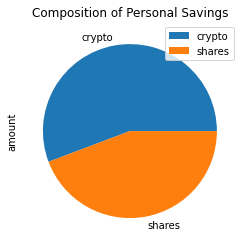

In [29]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [30]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = total_crypto + total_shares_value

# Validate saving health
# YOUR CODE HERE!
if emergency_fund < total_savings:
        print("Congratuations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
        print("Congratulations! You have reach this financial goal")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")

Congratuations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [36]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = datetime.today().strftime('%Y-%m-%d')

end_date = (datetime.now() - timedelta(5 * 365)).strftime('%Y-%m-%d')
print(end_date)
# start_date = pd.Timestamp('2016-06-10', tz='America/New_York').isoformat()
# end_date = pd.Timestamp('2021-06-10', tz='America/New_York').isoformat()

2016-06-12


In [37]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
tickers = ["AGG","SPY"]
df_stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date).df
df_stock_data.index = df_stock_data.index.date
# Display sample data
df_stock_data.head()

AGG                                          SPY            \
              open      high       low   close   volume    open      high   
2021-01-20  117.35  117.4300  117.3100  117.40  3877734  381.11  384.7900   
2021-01-21  117.22  117.2985  117.1400  117.26  5801029  384.49  384.9500   
2021-01-22  117.29  117.3200  117.1900  117.26  3469745  382.25  384.1256   
2021-01-25  117.39  117.5600  117.3600  117.54  3977366  383.67  384.7700   
2021-01-26  117.46  117.5850  117.4255  117.51  3451493  385.41  385.8500   

                                       
                low   close    volume  
2021-01-20  380.690  383.86  53064901  
2021-01-21  383.250  384.20  41800991  
2021-01-22  381.835  382.86  39108239  
2021-01-25  378.460  384.40  61090775  
2021-01-26  383.540  383.83  36871235

In [38]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)

In [39]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_even_dist.portfolio_data.head()


AGG                                                       SPY  \
              open      high       low   close   volume daily_return    open   
2021-01-20  117.35  117.4300  117.3100  117.40  3877734          NaN  381.11   
2021-01-21  117.22  117.2985  117.1400  117.26  5801029    -0.001193  384.49   
2021-01-22  117.29  117.3200  117.1900  117.26  3469745     0.000000  382.25   
2021-01-25  117.39  117.5600  117.3600  117.54  3977366     0.002388  383.67   
2021-01-26  117.46  117.5850  117.4255  117.51  3451493    -0.000255  385.41   

                                                              
                high      low   close    volume daily_return  
2021-01-20  384.7900  380.690  383.86  53064901          NaN  
2021-01-21  384.9500  383.250  384.20  41800991     0.000886  
2021-01-22  384.1256  381.835  382.86  39108239    -0.003488  
2021-01-25  384.7700  378.460  384.40  61090775     0.004022  
2021-01-26  385.8500  383.540  383.83  36871235    -0.001483

In [40]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997982,1.011912,1.000866,1.008448,0.998684,1.000611,0.996506,1.004583,0.996694,0.994360,...,1.001620,0.991699,1.001937,0.998053,1.001313,0.996671,1.002334,0.997803,1.004933,1.001194
2,0.993501,1.017279,0.997716,0.993813,0.998419,1.006060,1.002447,1.007496,0.994671,0.992457,...,1.009247,0.989768,0.989671,1.005126,1.002013,0.988177,1.001287,0.996520,1.006214,1.005456
3,0.993713,1.021395,0.997993,1.001412,0.998153,1.008582,1.015886,0.996849,0.998759,0.995373,...,1.008771,0.992323,0.984499,1.005050,1.001454,0.985304,0.999254,1.003614,1.004682,1.005168
4,0.991143,1.027333,1.000939,1.002434,1.002556,1.012530,1.007660,0.992148,1.003342,0.991873,...,1.006792,0.995376,0.984692,1.006247,0.983359,0.986678,0.998591,1.010385,1.013677,1.018416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,49.472479,83.981849,37.838685,107.583726,100.109610,27.220620,31.046836,81.084860,68.991637,71.745763,...,93.929122,85.750542,189.454453,59.264678,79.561407,58.130007,58.415958,123.408663,64.307311,46.139308
7557,49.243419,83.906597,37.900015,107.698956,100.244793,27.017711,30.914809,81.263188,69.311789,72.099473,...,92.976641,86.413345,187.052854,59.680290,78.949505,58.019232,58.523396,122.153492,64.288119,46.164429
7558,49.130565,83.863815,38.152049,108.635621,100.254259,26.786129,30.760812,81.084846,69.648882,72.061480,...,93.349468,87.004103,187.269282,59.439249,79.838032,57.958820,58.213217,122.013534,64.161967,46.080046
7559,49.551175,84.123856,38.107607,109.104308,101.363473,26.614056,30.635845,81.125082,70.281131,71.459102,...,93.440171,86.902487,185.246582,59.379840,81.076667,58.168003,57.940434,122.581609,63.212742,46.090079


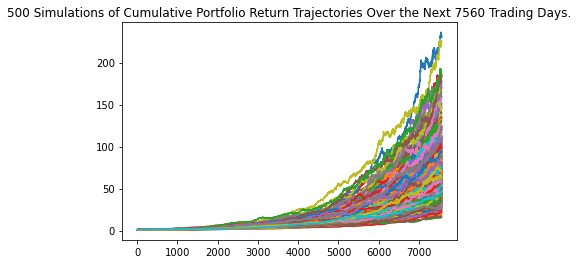

In [46]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_even_dist.plot_simulation()

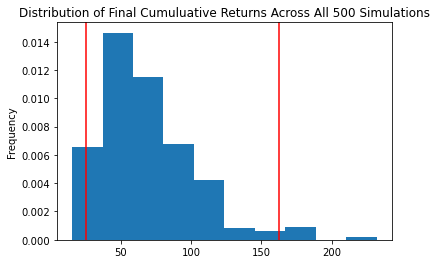

In [47]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [48]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl = MC_even_dist.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(even_tbl)

count           500.000000
mean             69.213751
std              33.839928
min              15.671511
25%              44.622960
50%              61.650183
75%              86.770275
max             231.633777
95% CI Lower     25.299109
95% CI Upper    162.637328
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [49]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $505,982.17 and $3,252,746.56


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [50]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $758,973.26 and $4,879,119.84


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [51]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_five = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)
MC_even_dist_five.portfolio_data.head()

AGG                                                       SPY  \
              open      high       low   close   volume daily_return    open   
2021-01-20  117.35  117.4300  117.3100  117.40  3877734          NaN  381.11   
2021-01-21  117.22  117.2985  117.1400  117.26  5801029    -0.001193  384.49   
2021-01-22  117.29  117.3200  117.1900  117.26  3469745     0.000000  382.25   
2021-01-25  117.39  117.5600  117.3600  117.54  3977366     0.002388  383.67   
2021-01-26  117.46  117.5850  117.4255  117.51  3451493    -0.000255  385.41   

                                                              
                high      low   close    volume daily_return  
2021-01-20  384.7900  380.690  383.86  53064901          NaN  
2021-01-21  384.9500  383.250  384.20  41800991     0.000886  
2021-01-22  384.1256  381.835  382.86  39108239    -0.003488  
2021-01-25  384.7700  378.460  384.40  61090775     0.004022  
2021-01-26  385.8500  383.540  383.83  36871235    -0.001483

In [52]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005069,1.006590,1.000973,0.995859,1.002731,1.004408,1.000941,1.005027,1.001513,0.999206,...,1.004196,0.995774,1.007256,0.997798,0.996260,0.996215,1.007996,1.000325,1.000664,1.003971
2,1.001525,1.007009,0.990853,0.998280,1.006361,1.006519,1.000759,1.005829,1.004584,0.995942,...,0.998296,1.003151,1.020734,1.004045,1.010031,0.993812,1.015038,1.002616,0.999062,0.997135
3,0.996614,1.008841,1.002497,1.001210,1.002121,1.008635,0.998561,1.005697,1.013474,1.000246,...,1.004691,1.008915,1.017898,1.005319,1.009218,0.990885,1.015497,1.001506,1.000890,1.007018
4,0.996931,1.001468,0.992051,1.003530,1.004154,1.005057,0.993315,1.011475,1.010593,1.001584,...,0.990343,1.013153,1.015783,1.006761,1.013992,0.994116,1.019386,0.997265,1.006218,1.009564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.868926,2.019488,1.558587,1.829077,1.946358,2.628336,2.207664,1.140667,2.374956,2.166483,...,2.467103,1.697553,2.013355,1.795992,1.728450,1.620431,1.512440,2.240931,2.148569,2.832769
1257,1.872210,2.024315,1.564025,1.821552,1.935544,2.622406,2.185822,1.132480,2.381998,2.145515,...,2.473821,1.701348,2.016190,1.785762,1.734519,1.603631,1.502689,2.210875,2.139599,2.856635
1258,1.875954,2.024012,1.570804,1.811711,1.942808,2.628401,2.195850,1.129224,2.388578,2.137794,...,2.473383,1.700777,2.036069,1.780408,1.734147,1.597713,1.491504,2.200408,2.113472,2.839531
1259,1.889511,2.031451,1.578582,1.802053,1.918649,2.639359,2.195197,1.132919,2.392471,2.128088,...,2.471982,1.682385,2.021683,1.775283,1.736371,1.601197,1.483658,2.219451,2.111540,2.828100


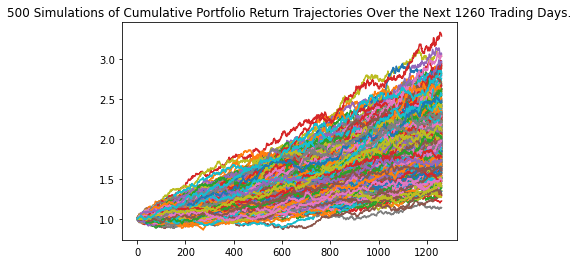

In [53]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_five = MC_even_dist_five.plot_simulation()

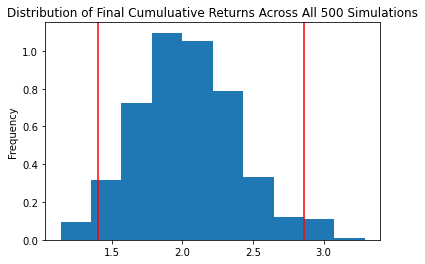

In [54]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_five = MC_even_dist_five.plot_distribution()

In [55]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl_five = MC_even_dist_five.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(even_tbl_five)

count           500.000000
mean              2.032684
std               0.356348
min               1.138327
25%               1.793973
50%               2.011967
75%               2.251861
max               3.290965
95% CI Lower      1.405493
95% CI Upper      2.860742
Name: 1260, dtype: float64


In [57]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(even_tbl_five[8]*60000,2)
ci_upper_five = round(even_tbl_five[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:,.2f} and ${ci_upper_five:,.2f}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $84,329.58 and $171,644.49


### Ten Years Retirement Option

In [58]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_ten = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*10)
MC_even_dist_ten.portfolio_data.head()

AGG                                                       SPY  \
              open      high       low   close   volume daily_return    open   
2021-01-20  117.35  117.4300  117.3100  117.40  3877734          NaN  381.11   
2021-01-21  117.22  117.2985  117.1400  117.26  5801029    -0.001193  384.49   
2021-01-22  117.29  117.3200  117.1900  117.26  3469745     0.000000  382.25   
2021-01-25  117.39  117.5600  117.3600  117.54  3977366     0.002388  383.67   
2021-01-26  117.46  117.5850  117.4255  117.51  3451493    -0.000255  385.41   

                                                              
                high      low   close    volume daily_return  
2021-01-20  384.7900  380.690  383.86  53064901          NaN  
2021-01-21  384.9500  383.250  384.20  41800991     0.000886  
2021-01-22  384.1256  381.835  382.86  39108239    -0.003488  
2021-01-25  384.7700  378.460  384.40  61090775     0.004022  
2021-01-26  385.8500  383.540  383.83  36871235    -0.001483

In [59]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008117,0.998135,1.003366,0.998993,1.008840,1.000700,0.994000,0.997827,0.999818,0.992509,...,1.007874,1.003083,1.007125,0.998936,1.000951,1.000370,0.998679,1.002771,0.999287,0.995902
2,1.012313,0.998401,1.009673,0.989154,1.015856,1.000104,0.987465,1.004607,0.998278,0.999074,...,1.012803,1.008767,1.007753,0.996960,0.997583,0.993180,0.994415,1.005348,0.990600,1.002669
3,1.012388,0.991152,0.998905,0.992110,1.010843,0.994621,0.985382,0.999868,1.005675,0.996050,...,1.012494,1.023275,1.002551,0.996687,0.997294,0.991029,1.000656,1.006405,0.990462,0.998836
4,1.010598,0.989718,0.999197,0.985901,1.010184,0.996162,0.983767,0.993041,1.006609,0.999429,...,1.016393,1.030045,1.005912,0.999020,0.994581,0.993664,1.000644,1.012255,0.994766,1.002174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.082373,4.709831,3.305724,5.511015,4.636355,2.536977,4.013800,4.518946,4.637539,2.390998,...,4.488982,5.999068,5.306844,5.203344,4.229752,3.332068,3.734632,4.935023,2.900856,2.917284
2517,5.115808,4.704581,3.331300,5.532129,4.624530,2.532186,4.037173,4.555673,4.640721,2.385321,...,4.469327,6.019193,5.324621,5.177370,4.233204,3.306335,3.742561,4.966834,2.901032,2.949912
2518,5.137104,4.706976,3.345675,5.515178,4.627724,2.554568,4.042668,4.511773,4.672408,2.404583,...,4.466829,6.085117,5.326257,5.219452,4.219574,3.304142,3.789869,4.962778,2.861685,2.951235
2519,5.104525,4.704216,3.329905,5.535528,4.624160,2.551599,4.002176,4.549615,4.687864,2.404409,...,4.439047,6.096994,5.353632,5.194451,4.205549,3.284395,3.806797,4.973969,2.871306,2.964151


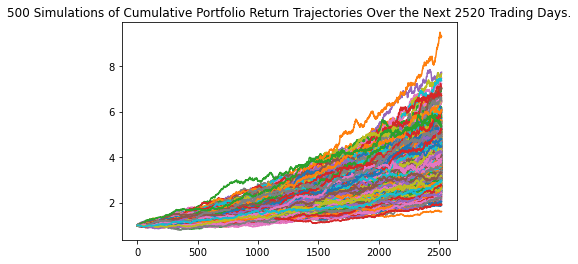

In [60]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_ten = MC_even_dist_ten.plot_simulation()

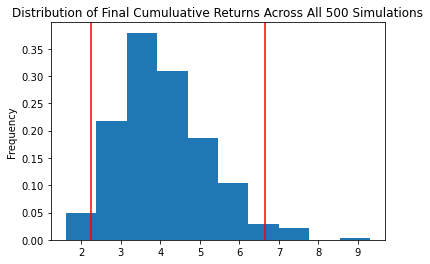

In [61]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_ten = MC_even_dist_ten.plot_distribution()

In [62]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(even_tbl_ten)

count           500.000000
mean              4.082958
std               1.133155
min               1.608404
25%               3.321733
50%               3.928366
75%               4.743745
max               9.306749
95% CI Lower      2.252339
95% CI Upper      6.647611
Name: 2520, dtype: float64


In [64]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_ten = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(even_tbl_ten[8]*60000,2)
ci_upper_ten = round(even_tbl_ten[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:,.2f} and ${ci_upper_ten:,.2f}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $135,140.37 and $398,856.67


In [65]:
def calc_mc(investment, years=5, weights = [.40,.60], num_simulation = 100):
    MC_even_dist_ten = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*10)
    MC_even_dist_ten.portfolio_data.head()
    # Running a Monte Carlo simulation to forecast 10 years cumulative returns
    # YOUR CODE HERE!
    MC_even_dist_ten.calc_cumulative_return()
    # Plot simulation outcomes
    # YOUR CODE HERE!
    line_plot_ten = MC_even_dist_ten.plot_simulation()
    # Fetch summary statistics from the Monte Carlo simulation results
    # YOUR CODE HERE!
    even_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()
    # Print summary statistics
    # YOUR CODE HERE!
    print(even_tbl_ten)
    # Set initial investment
    # YOUR CODE HERE!
    initial_investment_ten = 60000
    # Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
    # YOUR CODE HERE!
    ci_lower_ten = round(even_tbl_ten[8]*60000,2)
    ci_upper_ten = round(even_tbl_ten[9]*60000,2)
    # Print results
    print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
          f" over the next 10 years will end within in the range of"
          f" ${ci_lower_ten:,.2f} and ${ci_upper_ten:,.2f}")

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

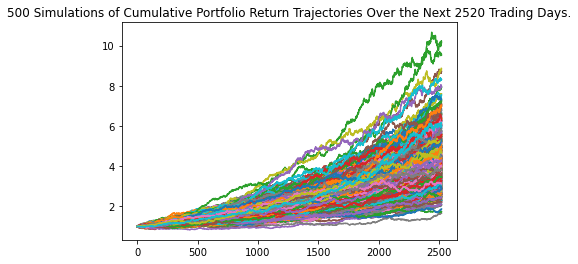

In [67]:
calc_mc(1000, 5)